In [1]:
import numpy  as np 
import pandas as pd 
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
data = pd.read_csv("Customer_Churn_telecom.csv")

NameError: name 'pd' is not defined

In [3]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.shape

(3333, 21)

In [5]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [9]:
len(data['state'].unique())

51

In [4]:
l1=list(data['state'])
from collections import Counter
l2=Counter(l1)

key = l2.keys()

df = pd.DataFrame(l2,index=key)
df.drop(df.columns[1:], inplace=True)

In [12]:
df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,52,80,55,64,34,66,74,54,61,63,...,60,53,72,72,77,73,66,78,106,77


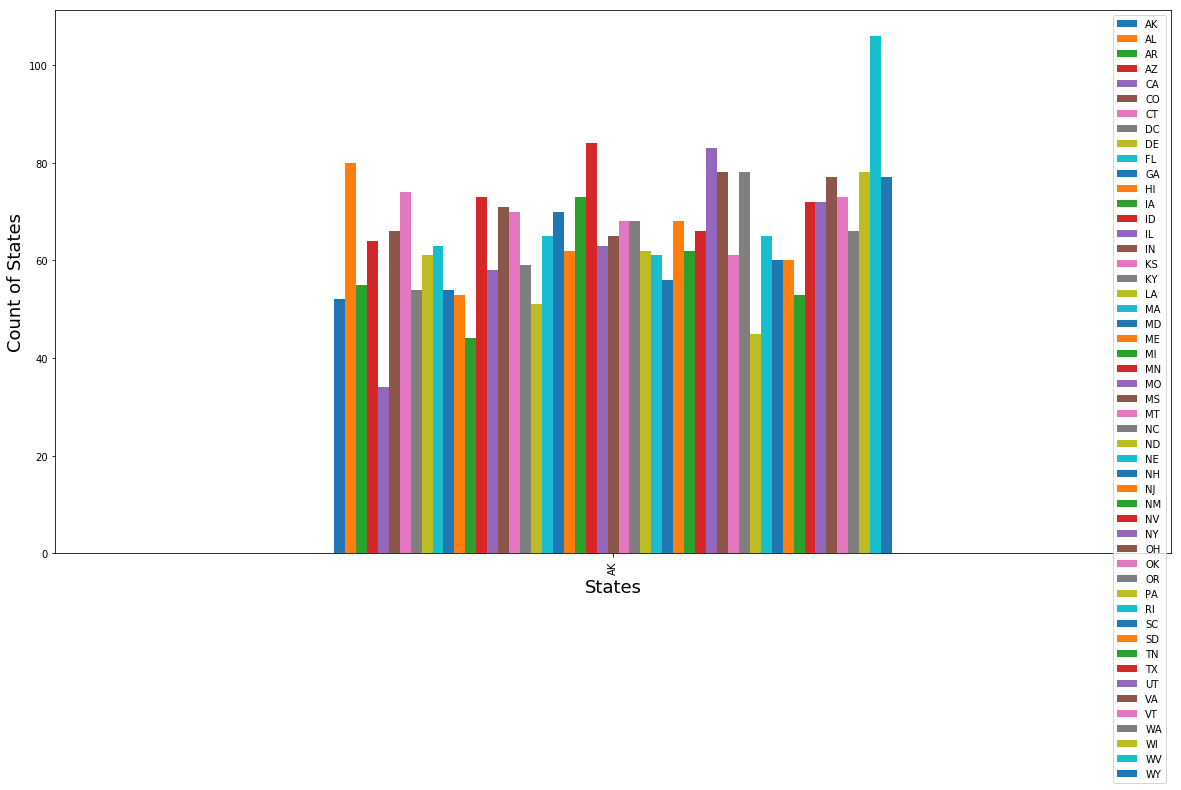

In [5]:
df.plot(kind='bar', figsize=(20,10))
plt.xlabel('States', fontsize=18)
plt.ylabel('Count of States', fontsize=18)
plt.show()

In [15]:
states=data.groupby("state").size()
states

state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
dtype: int64

In [17]:
data["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [6]:
intl_plan =data.groupby("international plan").size()

In [19]:
intl_plan

international plan
no     3010
yes     323
dtype: int64

In [7]:
print  ("Not subscribed to intl_plan in percent:\t{}".format((intl_plan["no"]/3333)*100))
print ("Subscribed to intl_plan in percent:\t{}".format((intl_plan["yes"]/3333)*100))

Not subscribed to intl_plan in percent:	90.3090309030903
Subscribed to intl_plan in percent:	9.69096909690969


In [8]:
Account_length=data.groupby('account length')

In [11]:
Account_length

In [9]:
VMail_Plan =data.groupby('voice mail plan').size()

In [13]:
VMail_Plan

voice mail plan
no     2411
yes     922
dtype: int64

In [10]:
print ("Not subscribed to VMail_Plan in percent:{}".format((VMail_Plan["no"]/3333)*100))
print ("Subscribed to VMail_Plan in percent:\t{}".format((VMail_Plan["yes"]/3333)*100))

Not subscribed to VMail_Plan in percent:72.33723372337234
Subscribed to VMail_Plan in percent:	27.662766276627664


In [11]:
CustServ_Calls =data.groupby('customer service calls').size()

In [12]:
CustServ_Calls

customer service calls
0     697
1    1181
2     759
3     429
4     166
5      66
6      22
7       9
8       2
9       2
dtype: int64

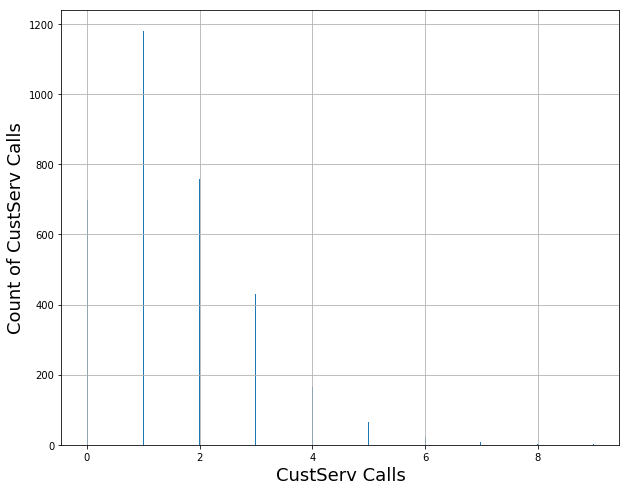

In [13]:
data["customer service calls"].hist(bins=500,figsize=(10,8))
plt.xlabel('CustServ Calls', fontsize=18)
plt.ylabel('Count of CustServ Calls', fontsize=18)
plt.show()

In [14]:
Area_Code= data.groupby(['area code']).size()


In [15]:
Area_Code

area code
408     838
415    1655
510     840
dtype: int64

In [16]:
Account_Length= data["account length"]


In [44]:
Account_Length

0       128
1       107
2       137
3        84
4        75
5       118
6       121
7       147
8       117
9       141
10       65
11       74
12      168
13       95
14       62
15      161
16       85
17       93
18       76
19       73
20      147
21       77
22      130
23      111
24      132
25      174
26       57
27       54
28       20
29       49
       ... 
3303    114
3304     71
3305     58
3306    106
3307    172
3308     45
3309    100
3310     94
3311    128
3312    181
3313    127
3314     89
3315    149
3316    103
3317    163
3318     52
3319     89
3320    122
3321     60
3322     62
3323    117
3324    159
3325     78
3326     96
3327     79
3328    192
3329     68
3330     28
3331    184
3332     74
Name: account length, Length: 3333, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'show'

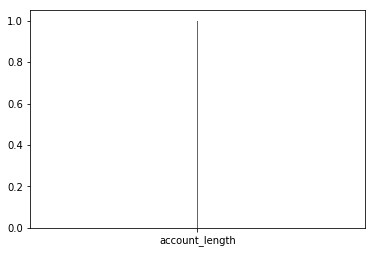

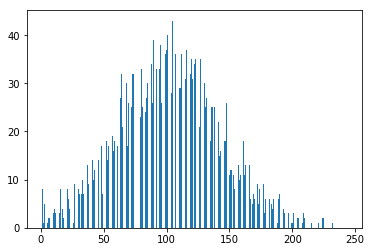

In [17]:
import matplotlib.pyplot as plt
plt.hist(Account_Length, bins=500)
plt.show()

In [18]:
churn=data.groupby('churn').size()

In [26]:
churn

churn
False    2850
True      483
dtype: int64

In [19]:
State_Churn=data.groupby(['state', 'churn']).size()

In [28]:
State_Churn

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
       True     11
AZ     False    60
       True      4
CA     False    25
       True      9
CO     False    57
       True      9
CT     False    62
       True     12
DC     False    49
       True      5
DE     False    52
       True      9
FL     False    55
       True      8
GA     False    46
       True      8
HI     False    50
       True      3
IA     False    41
       True      3
ID     False    64
       True      9
IL     False    53
       True      5
                ..
OK     False    52
       True      9
OR     False    67
       True     11
PA     False    37
       True      8
RI     False    59
       True      6
SC     False    46
       True     14
SD     False    52
       True      8
TN     False    48
       True      5
TX     False    54
       True     18
UT     False    62
       True     10
VA     False    72
       True      5
VT     False    65

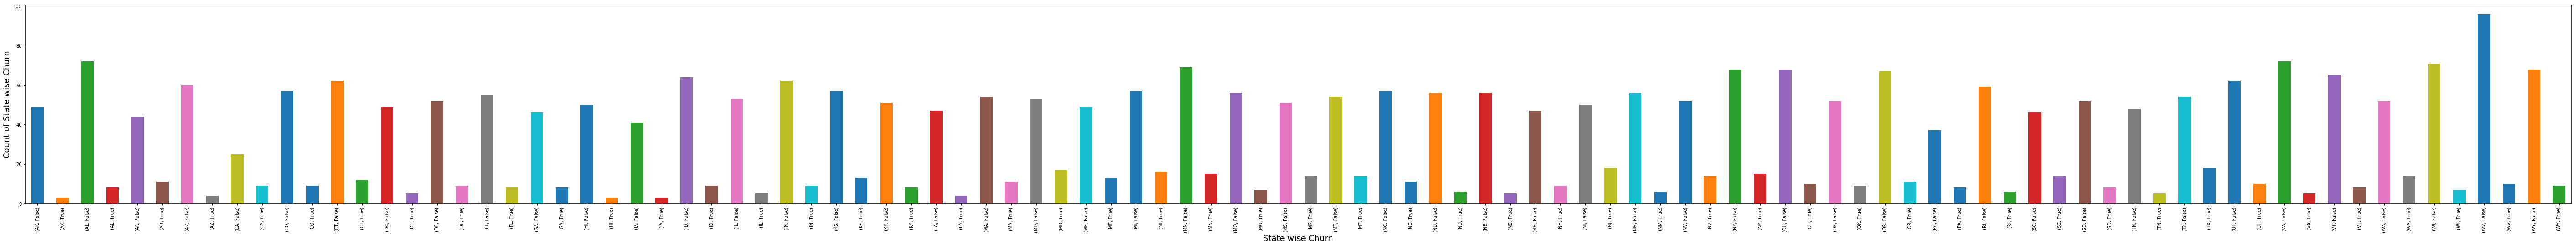

In [20]:
State_Churn.plot( kind= 'bar', figsize=(100,8))
plt.xlabel('State wise Churn', fontsize=18)
plt.ylabel('Count of State wise Churn', fontsize=18)
plt.show()

In [21]:
Intl_Churn=data.groupby(["international plan", 'churn']).size()

In [22]:
Intl_Churn

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
dtype: int64

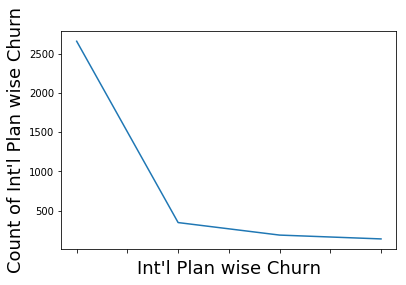

In [23]:
Intl_Churn.plot()
plt.xlabel("Int'l Plan wise Churn", fontsize=18)
plt.ylabel("Count of Int'l Plan wise Churn", fontsize=18)
plt.show()


In [24]:
a=print ("No Intl_plan and Churn in percent:{}".format((Intl_Churn["no"]/intl_plan['no'])*100))
print ('\n----------------------------------------\n')
b=print ("Intl_plan and Churn in percent:{}".format((Intl_Churn["yes"]/intl_plan['yes'])*100))

No Intl_plan and Churn in percent:churn
False    88.504983
True     11.495017
dtype: float64

----------------------------------------

Intl_plan and Churn in percent:churn
False    57.585139
True     42.414861
dtype: float64


In [25]:
import seaborn as sns
sns.set_style("whitegrid")

AttributeError: module 'seaborn' has no attribute 'plt'

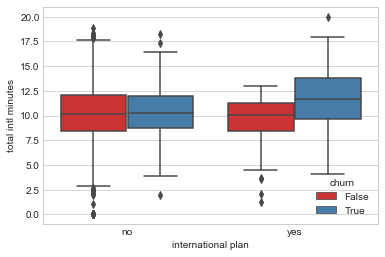

In [26]:
ax  =  sns.boxplot(x="international plan", y="total intl minutes", hue="churn", data=data, palette="Set1")
sns.plt.show()

In [27]:
bins = [0, 12, 24, 48, 60, 72, 84, 96, 108, 120, 132, 144, 168, 180, 192, 204, 216, 228, 240, 252]

categories = pd.cut(Account_Length, bins)

In [28]:
Account_Churn=data.groupby([categories, "churn"]).size()

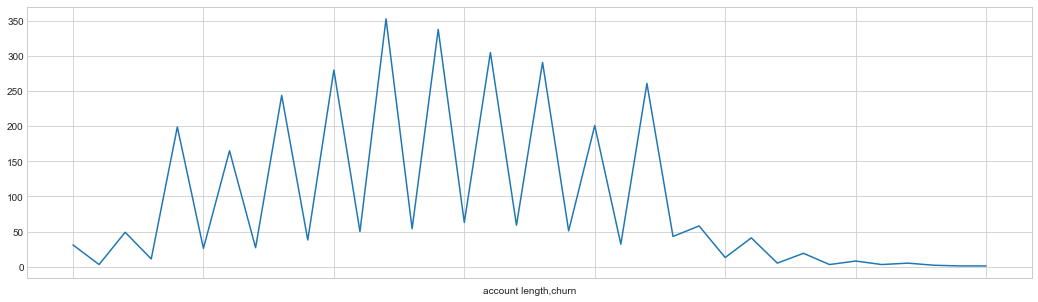

In [29]:
Account_Churn.plot(figsize=(18,5))
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

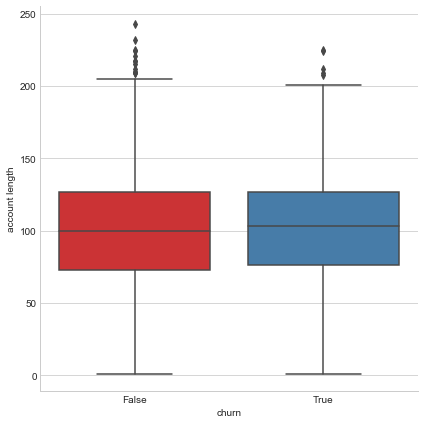

In [75]:
g = sns.factorplot(y="account length", x="churn", data=data,
                   size=6, kind="box", palette="Set1")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

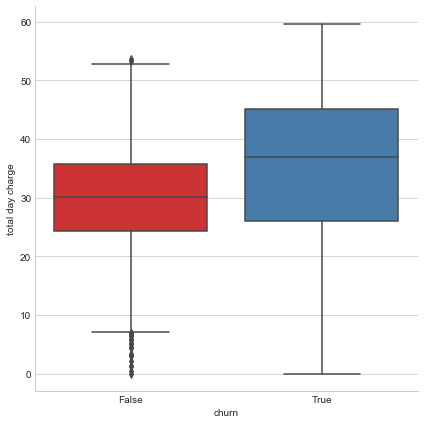

In [30]:
g = sns.factorplot(y="total day charge", x="churn", data=data,
                   size=6, kind="box", palette="Set1")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

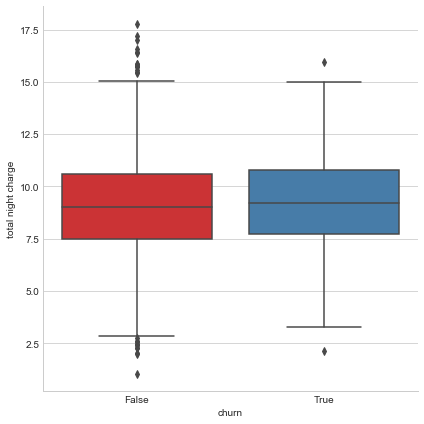

In [31]:
gg  = sns.factorplot (y="total night charge", x="churn", data=data,
                   size=6, kind="box", palette="Set1")
sns.plt.show()

In [32]:
VMail_Churn=data.groupby(['voice mail plan', 'churn']).size()

In [33]:
VMail_Churn

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
dtype: int64

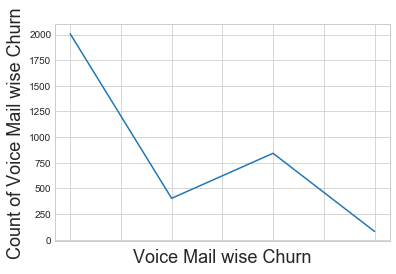

In [34]:
VMail_Churn.plot()
plt.xlabel('Voice Mail wise Churn', fontsize=18)
plt.ylabel('Count of Voice Mail wise Churn', fontsize=18)
plt.show()

In [35]:
print ("No VMail Plan and Chrun in percent:{}".format((VMail_Churn["no"]/VMail_Plan['no'])*100))
print ('\n----------------------------------------\n')
print ("VMail Plann and Chrun in percent:{}".format((VMail_Churn["yes"]/VMail_Plan['yes'])*100))

No VMail Plan and Chrun in percent:churn
False    83.284944
True     16.715056
dtype: float64

----------------------------------------

VMail Plann and Chrun in percent:churn
False    91.32321
True      8.67679
dtype: float64


In [36]:
Custserv_Churn=data.groupby(['customer service calls','churn']).size()

In [37]:
Custserv_Churn

customer service calls  churn
0                       False     605
                        True       92
1                       False    1059
                        True      122
2                       False     672
                        True       87
3                       False     385
                        True       44
4                       False      90
                        True       76
5                       False      26
                        True       40
6                       False       8
                        True       14
7                       False       4
                        True        5
8                       False       1
                        True        1
9                       True        2
dtype: int64

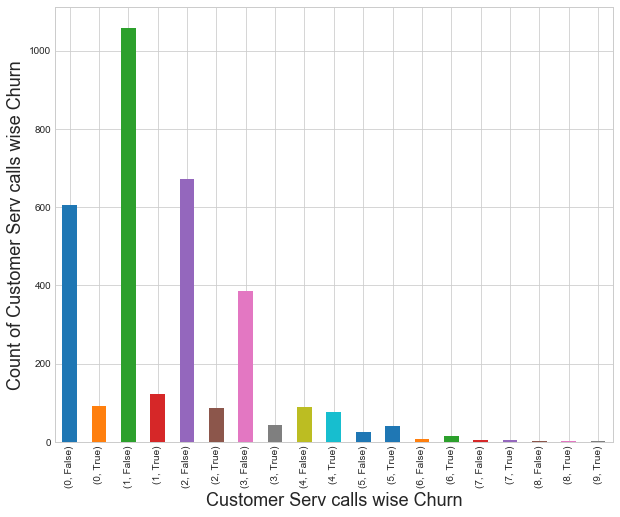

In [38]:
Custserv_Churn.plot(kind= 'bar', figsize=(10,8))
plt.xlabel('Customer Serv calls wise Churn', fontsize=18)
plt.ylabel('Count of Customer Serv calls wise Churn', fontsize=18)
plt.show()

In [39]:
#Replacing the string columns with int values:
#No replaced with 0
#Yes replaced with 1


data["international plan"].replace(['no','yes'],[0,1],inplace=True)

In [40]:
data["voice mail plan"].replace(['no', 'yes'], [0, 1], inplace=True)


In [41]:

data["churn"].replace(['False', 'True'], [0, 1], inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=bool)' and 'str'

In [42]:
churn

churn
False    2850
True      483
dtype: int64

In [64]:
data['total night charge']

0       11.01
1       11.45
2        7.32
3        8.86
4        8.41
5        9.18
6        9.57
7        9.53
8        9.71
9       14.69
10       9.40
11       8.82
12       6.35
13       8.65
14       9.14
15       7.23
16       4.02
17       5.83
18       7.46
19       8.68
20       9.40
21       9.43
22       8.18
23       8.53
24      10.67
25      11.28
26       8.22
27       4.59
28       8.17
29       8.04
        ...  
3303    11.14
3304     9.29
3305     7.84
3306    10.33
3307     7.23
3308    11.97
3309    11.49
3310    10.12
3311     8.47
3312    11.81
3313     8.61
3314     5.94
3315     8.02
3316     9.91
3317     9.50
3318     8.66
3319    12.64
3320     5.40
3321     9.45
3322     8.12
3323    10.22
3324     8.72
3325    10.95
3326     8.05
3327     9.96
3328    12.56
3329     8.61
3330     8.64
3331     6.26
3332    10.86
Name: total night charge, Length: 3333, dtype: float64

In [43]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['international plan', 'voice mail plan', 'account length', 'customer service calls', 
                'total day charge', 'total night charge']
X = data[feature_cols]
y = data.churn

logreg.fit(X,y)
pred = logreg.predict(X)

In [44]:
pred

array([False, False, False, ..., False,  True, False])

In [47]:
#Logistic Regression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape


logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 

709 / 834 correct


0.8501199040767387

In [48]:
#Accuracy score by Logistic Regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 


0.8501199040767387

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

      False       0.88      0.96      0.92       718
       True       0.41      0.17      0.24       116

avg / total       0.81      0.85      0.82       834



In [51]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[689  29]
 [ 96  20]]


In [69]:
#Use Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predictions_RF = RF.predict(X_test)

In [74]:
#Accuracy by Random Forest
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 


0.829736211031175

In [75]:
#Use knn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [78]:
#Accuracy using KNN
from sklearn import metrics
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))


0.8081534772182254


In [80]:
#Decision Tree
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()
dTree.fit(X_train,y_train)
predictions = dTree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 



0.8237410071942446

In [ ]:
#Classification report and Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test, predictions_RF))
conf = confusion_matrix(Y_test,predictions_RF)